In [65]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    CategoricalNB,
    ComplementNB,
    BernoulliNB,
)
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Combine all PDBs into a single dataframe
ring_path = Path(
    "/home/antonio/Desktop/MrMagi/4semestre/SBio/project/sb_project/sb_project/features_ring/"
)
dfs = []
for filename in os.listdir(ring_path):
    dfs.append(pd.read_csv(ring_path / filename, sep="\t"))
df = pd.concat(dfs)
df

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,1v30,A,17,,R,S,0.004,13.0,17.0,-1.119,...,3.0,-1.496,2.874,H,1.831,-0.561,0.533,-0.277,1.648,HBOND
1,1v30,A,17,,R,S,0.004,13.0,17.0,-1.119,...,3.0,-1.496,2.874,H,1.831,-0.561,0.533,-0.277,1.648,VDW
2,1v30,A,39,,G,E,0.405,4.0,15.0,1.535,...,5.0,2.421,3.111,L,-0.384,1.652,1.330,1.045,2.064,HBOND
3,1v30,A,36,,W,E,0.405,8.0,18.0,-2.156,...,14.0,-1.234,-0.296,H,-0.228,1.399,-4.760,0.670,-2.647,NaN
4,1v30,A,78,,G,G,0.298,13.0,12.0,-1.360,...,8.0,-1.875,2.589,H,0.260,0.830,3.097,-0.838,1.512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7ng2,A,545,,L,G,0.171,16.0,4.0,-1.485,...,8.0,-1.892,2.163,H,-1.337,-0.279,-0.544,1.242,-1.262,NaN
248,7ng2,A,452,,K,E,0.146,14.0,21.0,-1.827,...,17.0,-2.449,1.865,H,-0.228,1.399,-4.760,0.670,-2.647,HBOND
249,7ng2,A,452,,K,E,0.146,14.0,21.0,-1.827,...,17.0,-2.449,1.865,H,-0.228,1.399,-4.760,0.670,-2.647,VDW
250,7ng2,A,445,,T,-,0.528,7.0,19.0,-1.437,...,18.0,-2.382,2.230,H,0.336,-0.417,-1.673,-1.474,-0.078,HBOND


In [19]:
new_df = pd.DataFrame(df.iloc[:1000000, :])
new_df.dropna(inplace=True)

y = new_df["Interaction"].astype("category")

# Define training features
X = new_df[
    [
        "s_rsa",
        "s_up",
        "s_down",
        "s_phi",
        "s_psi",
        "s_a1",
        "s_a2",
        "s_a3",
        "s_a4",
        "s_a5",
        "t_rsa",
        "t_up",
        "t_down",
        "t_phi",
        "t_psi",
        "t_a1",
        "t_a2",
        "t_a3",
        "t_a4",
        "t_a5",
    ]
]

# Calculate percentiles and transform into categories
X = X.rank(pct=True).round(1).astype("category")

# Split the dataset to define training and testing examples
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)



In [16]:
bonds = ["HBOND", "IONIC", "PICATION", "PIHBOND", "PIPISTACK", "SSBOND", "VDW"]

for bond in bonds:
    newcount = len(new_df[new_df["Interaction"] == bond])
    count = len(df[df["Interaction"] == bond])
    print(f"this is new_df {bond}: {newcount}")
    print(f"this is df{bond}: {count}\n")

this is new_df HBOND: 557654
this is dfHBOND: 820333

this is new_df IONIC: 18732
this is dfIONIC: 27538

this is new_df PICATION: 4529
this is dfPICATION: 6874

this is new_df PIHBOND: 1139
this is dfPIHBOND: 1669

this is new_df PIPISTACK: 20286
this is dfPIPISTACK: 30117

this is new_df SSBOND: 1089
this is dfSSBOND: 1657

this is new_df VDW: 396571
this is dfVDW: 583192



In [20]:
# Remove all rows with NaN in at least one column
# including rows with missing class (they could be false negatives)
df.dropna(inplace=True)

# Define ground truth values
y = df["Interaction"].astype("category")
y

0      HBOND
1        VDW
2      HBOND
5        VDW
6      HBOND
       ...  
246    HBOND
248    HBOND
249      VDW
250    HBOND
251    HBOND
Name: Interaction, Length: 1471380, dtype: category
Categories (7, object): ['HBOND', 'IONIC', 'PICATION', 'PIHBOND', 'PIPISTACK', 'SSBOND', 'VDW']

In [22]:
# Define training features
X = df[
    [
        "s_rsa",
        "s_up",
        "s_down",
        "s_phi",
        "s_psi",
        "s_a1",
        "s_a2",
        "s_a3",
        "s_a4",
        "s_a5",
        "t_rsa",
        "t_up",
        "t_down",
        "t_phi",
        "t_psi",
        "t_a1",
        "t_a2",
        "t_a3",
        "t_a4",
        "t_a5",
    ]
]

# Calculate percentiles and transform into categories
X = X.rank(pct=True).round(1).astype("category")
X 

,s_rsa,s_up,s_down,s_phi,s_psi,s_a1,s_a2,s_a3,s_a4,s_a5,t_rsa,t_up,t_down,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5
0,0.2,0.3,0.5,0.6,0.9,0.9,0.6,0.8,0.6,1.0,0.5,0.6,0.0,0.3,1.0,1.0,0.3,0.5,0.3,0.8
1,0.2,0.3,0.5,0.6,0.9,0.9,0.6,0.8,0.6,1.0,0.5,0.6,0.0,0.3,1.0,1.0,0.3,0.5,0.3,0.8
2,0.8,0.1,0.3,1.0,0.6,0.4,0.9,0.6,0.8,0.9,0.7,0.5,0.0,1.0,1.0,0.4,1.0,0.6,0.7,0.9
5,0.4,1.0,0.0,0.3,0.6,0.1,0.4,0.9,0.5,0.6,0.6,0.4,0.1,0.9,0.4,0.8,0.1,0.7,0.4,0.4
6,0.4,0.5,1.0,0.2,0.8,0.0,0.5,0.4,0.8,0.2,0.4,0.5,0.8,0.2,0.8,0.8,0.1,0.7,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.1,0.7,0.6,0.3,0.8,0.1,0.4,0.9,0.5,0.6,0.2,0.3,0.8,1.0,0.6,0.4,1.0,0.6,0.7,0.9
248,0.6,0.4,0.7,0.2,0.9,1.0,0.3,0.5,0.2,0.9,0.1,0.7,0.5,0.0,0.7,0.5,0.9,0.0,0.7,0.1
249,0.6,0.4,0.7,0.2,0.9,1.0,0.3,0.5,0.2,0.9,0.1,0.7,0.5,0.0,0.7,0.5,0.9,0.0,0.7,0.1
250,0.9,0.1,0.6,0.4,0.9,0.5,0.7,0.9,0.7,0.8,0.2,0.7,0.6,0.1,0.8,0.6,0.5,0.2,0.0,0.5


In [23]:
# Split the dataset to define training and testing examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X.head(10)

,s_rsa,s_up,s_down,s_phi,s_psi,s_a1,s_a2,s_a3,s_a4,s_a5,t_rsa,t_up,t_down,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5
0,0.2,0.3,0.5,0.6,0.9,0.9,0.6,0.8,0.6,1.0,0.5,0.6,0.0,0.3,1.0,1.0,0.3,0.5,0.3,0.8
1,0.2,0.3,0.5,0.6,0.9,0.9,0.6,0.8,0.6,1.0,0.5,0.6,0.0,0.3,1.0,1.0,0.3,0.5,0.3,0.8
2,0.8,0.1,0.3,1.0,0.6,0.4,0.9,0.6,0.8,0.9,0.7,0.5,0.0,1.0,1.0,0.4,1.0,0.6,0.7,0.9
5,0.4,1.0,0.0,0.3,0.6,0.1,0.4,0.9,0.5,0.6,0.6,0.4,0.1,0.9,0.4,0.8,0.1,0.7,0.4,0.4
6,0.4,0.5,1.0,0.2,0.8,0.0,0.5,0.4,0.8,0.2,0.4,0.5,0.8,0.2,0.8,0.8,0.1,0.7,0.4,0.4
7,0.8,0.2,0.0,0.7,0.2,0.9,0.6,0.8,0.6,1.0,0.6,0.4,0.0,0.9,0.8,0.1,0.4,0.9,0.5,0.6
9,1.0,0.0,0.4,0.9,0.5,0.3,0.6,0.5,0.0,0.4,1.0,0.0,0.4,0.9,0.5,1.0,0.3,0.5,0.3,0.8
10,0.5,0.5,0.1,0.7,0.1,0.5,0.7,0.9,0.7,0.8,0.8,0.2,0.1,0.7,0.1,0.9,0.6,0.8,0.6,1.0
11,0.3,0.7,0.1,0.2,0.6,0.2,0.2,0.3,0.9,0.3,0.6,0.9,0.0,0.5,1.0,0.4,0.1,0.4,1.0,0.5
12,0.6,0.2,0.2,0.8,0.5,0.6,0.4,0.2,0.0,0.6,0.4,0.6,0.6,0.1,0.9,0.6,0.9,1.0,0.1,0.8


### Test different versions of Naive Bayes

In [24]:
nb = GaussianNB()
y_new_pred = nb.fit(X_new_train, y_new_train).predict(X_new_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (X_new_test.shape[0], (y_new_test != y_new_pred).sum())
)

Number of mislabeled points out of a total 100000 points : 49372


In [25]:
nb = MultinomialNB()
y_new_pred = nb.fit(X_new_train, y_new_train).predict(X_new_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (X_new_test.shape[0], (y_new_test != y_new_pred).sum())
)

Number of mislabeled points out of a total 100000 points : 43944


In [26]:
nb = ComplementNB()
y_new_pred = nb.fit(X_new_train, y_new_train).predict(X_new_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (X_new_test.shape[0], (y_new_test != y_new_pred).sum())
)

Number of mislabeled points out of a total 100000 points : 60946


In [27]:
nb = BernoulliNB()
y_new_pred = nb.fit(X_new_train, y_new_train).predict(X_new_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (X_new_test.shape[0], (y_new_test != y_new_pred).sum())
)

Number of mislabeled points out of a total 100000 points : 43783


In [28]:
nb = CategoricalNB()
y_new_pred = nb.fit(X_new_train, y_new_train).predict(X_new_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (X_new_test.shape[0], (y_new_test != y_new_pred).sum())
)

Number of mislabeled points out of a total 100000 points : 43286


In [13]:
#y_new_pred = RandomForestClassifier().fit(X_new_train, y_new_train).predict(X_new_test)


#print(
#    "Number of mislabeled points out of a total %d points : %d"
#    % (X_new_test.shape[0], (y_new_test != y_new_pred).sum())
#)

#accuracy = accuracy_score(y_new_test, y_new_pred)
#print("Accuracy:", accuracy)

# Logistic Regression

In [14]:
bonds

['HBOND', 'IONIC', 'PICATION', 'PIHBOND', 'PIPISTACK', 'SSBOND', 'VDW']

# XGBoost

In [29]:
df_g = df.copy()
len(df_g)

1471380

In [30]:
bonds_dic = {
    'HBOND': 0,
    'IONIC': 1, 
    'PICATION': 2, 
    'PIHBOND': 3,
    'PIPISTACK': 4, 
    'SSBOND': 5, 
    'VDW': 6
}

In [36]:
df_g["Interaction"] = df_g["Interaction"].map(bonds_dic)
df_g.head(10)

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,1v30,A,17,,R,S,0.004,13.0,17.0,-1.119,...,3.0,-1.496,2.874,H,1.831,-0.561,0.533,-0.277,1.648,0
1,1v30,A,17,,R,S,0.004,13.0,17.0,-1.119,...,3.0,-1.496,2.874,H,1.831,-0.561,0.533,-0.277,1.648,6
2,1v30,A,39,,G,E,0.405,4.0,15.0,1.535,...,5.0,2.421,3.111,L,-0.384,1.652,1.330,1.045,2.064,0
5,1v30,A,107,,I,-,0.036,27.0,5.0,-1.704,...,9.0,-1.019,-0.538,H,1.357,-1.453,1.477,0.113,-0.837,6
6,1v30,A,12,,V,E,0.035,17.0,28.0,-1.958,...,21.0,-1.948,2.252,H,1.357,-1.453,1.477,0.113,-0.837,0
7,1v30,A,71,,R,H,0.343,9.0,8.0,-1.105,...,4.0,-0.901,2.294,H,-1.239,-0.547,2.131,0.393,0.816,0
9,1v30,A,24,,W,G,0.639,1.0,16.0,-1.004,...,15.0,-0.964,-0.432,H,1.831,-0.561,0.533,-0.277,1.648,0
10,1v30,A,68,,T,H,0.106,16.0,9.0,-1.107,...,8.0,-1.105,-0.778,H,1.538,-0.055,1.502,0.440,2.897,0
11,1v30,A,26,,L,G,0.018,20.0,11.0,-1.835,...,2.0,-1.241,2.821,H,-0.591,-1.302,-0.733,1.570,-0.146,0
12,1v30,A,23,,H,G,0.141,10.0,12.0,-1.067,...,19.0,-2.256,2.761,H,0.260,0.830,3.097,-0.838,1.512,4


In [37]:
Xg = df_g[
    [
        "s_rsa",
        "s_up",
        "s_down",
        "s_phi",
        "s_psi",
        "s_a1",
        "s_a2",
        "s_a3",
        "s_a4",
        "s_a5",
        "t_rsa",
        "t_up",
        "t_down",
        "t_phi",
        "t_psi",
        "t_a1",
        "t_a2",
        "t_a3",
        "t_a4",
        "t_a5",
    ]
]

yg = df_g["Interaction"]

In [39]:
yg.head(10)

0     0
1     6
2     0
5     6
6     0
7     0
9     0
10    0
11    0
12    4
Name: Interaction, dtype: int64

In [40]:
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.1)

In [45]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(eval_metric='mlogloss', n_estimators=10,learning_rate=0.1)

model_xgb.fit(Xg_train, yg_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [46]:
yg_pred = model_xgb.predict(Xg_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (Xg_test.shape[0], (yg_test != yg_pred).sum())
)

Number of mislabeled points out of a total 147138 points : 60890


In [47]:
# We try with early stopping
Xg_train, Xg_temp, yg_train, yg_temp = train_test_split(Xg, yg, test_size=0.3, random_state=73)
Xg_valid, Xg_test, yg_valid, yg_test = train_test_split(Xg_temp,yg_temp, test_size=0.5,random_state=73)

In [56]:
model_gv = xgb.XGBClassifier(eval_metric='mlogloss', n_estimators=20, learning_rate=0.6)
model_gv.fit(
    Xg_train, yg_train,
    eval_set=[(Xg_valid, yg_valid)],
    early_stopping_rounds=2,
    verbose=True
)

[0]	validation_0-mlogloss:1.25256
[1]	validation_0-mlogloss:1.04058
[2]	validation_0-mlogloss:0.92786
[3]	validation_0-mlogloss:0.86104
[4]	validation_0-mlogloss:0.81888
[5]	validation_0-mlogloss:0.79005
[6]	validation_0-mlogloss:0.77009
[7]	validation_0-mlogloss:0.75661
[8]	validation_0-mlogloss:0.74692
[9]	validation_0-mlogloss:0.73987
[10]	validation_0-mlogloss:0.73470
[11]	validation_0-mlogloss:0.73066
[12]	validation_0-mlogloss:0.72792
[13]	validation_0-mlogloss:0.72582
[14]	validation_0-mlogloss:0.72427
[15]	validation_0-mlogloss:0.72309
[16]	validation_0-mlogloss:0.72216
[17]	validation_0-mlogloss:0.72120
[18]	validation_0-mlogloss:0.71988
[19]	validation_0-mlogloss:0.71866


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [57]:
yg_pred = model_gv.predict(Xg_test)
print(
    "Number of mislabeled points out of a total %d points : %d"
    % (Xg_test.shape[0], (yg_test != yg_pred).sum())
)

Number of mislabeled points out of a total 220707 points : 88091


In [69]:
Xg

,s_rsa,s_up,s_down,s_phi,s_psi,s_a1,s_a2,s_a3,s_a4,s_a5,t_rsa,t_up,t_down,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5
0,0.004,13.0,17.0,-1.119,2.725,1.538,-0.055,1.502,0.440,2.897,0.141,18.0,3.0,-1.496,2.874,1.831,-0.561,0.533,-0.277,1.648
1,0.004,13.0,17.0,-1.119,2.725,1.538,-0.055,1.502,0.440,2.897,0.141,18.0,3.0,-1.496,2.874,1.831,-0.561,0.533,-0.277,1.648
2,0.405,4.0,15.0,1.535,0.333,-0.384,1.652,1.330,1.045,2.064,0.321,17.0,5.0,2.421,3.111,-0.384,1.652,1.330,1.045,2.064
5,0.036,27.0,5.0,-1.704,1.679,-1.239,-0.547,2.131,0.393,0.816,0.165,14.0,9.0,-1.019,-0.538,1.357,-1.453,1.477,0.113,-0.837
6,0.035,17.0,28.0,-1.958,2.361,-1.337,-0.279,-0.544,1.242,-1.262,0.041,17.0,21.0,-1.948,2.252,1.357,-1.453,1.477,0.113,-0.837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.000,21.0,20.0,-1.467,2.302,-1.239,-0.547,2.131,0.393,0.816,0.012,12.0,22.0,1.572,0.018,-0.384,1.652,1.330,1.045,2.064
248,0.146,14.0,21.0,-1.827,2.573,1.831,-0.561,0.533,-0.277,1.648,0.000,21.0,17.0,-2.449,1.865,-0.228,1.399,-4.760,0.670,-2.647
249,0.146,14.0,21.0,-1.827,2.573,1.831,-0.561,0.533,-0.277,1.648,0.000,21.0,17.0,-2.449,1.865,-0.228,1.399,-4.760,0.670,-2.647
250,0.528,7.0,19.0,-1.437,2.534,-0.032,0.326,2.213,0.908,1.313,0.005,21.0,18.0,-2.382,2.230,0.336,-0.417,-1.673,-1.474,-0.078


# Data visualization

<AxesSubplot:xlabel='t_phi', ylabel='t_psi'>

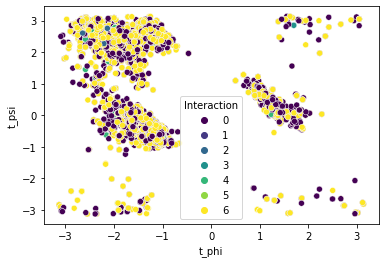

In [72]:
coolors = ['red','orange','yellow','green','light blue', 'indigo','violet']

feat1 = 't_phi'
feat2 = 't_psi'

df_p = pd.DataFrame(df_g.iloc[:10000, :])
sns.scatterplot(data=df_p,x=feat1,y=feat2,hue="Interaction",palette='viridis')

In [73]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feats = scaler.fit_transform(Xg)

In [93]:
pca = PCA(n_components=3)

principal_comps = pca.fit_transform(scaled_feats)

pca_df = pd.DataFrame(data=principal_comps, columns=['PC1','PC2','PC3'])

In [95]:
# reset yg index to concatenate it with pca_df
yg.reset_index(drop=True)
yg = yg.set_axis(pd.RangeIndex(start=0, stop=len(yg)) ,axis=0)

pca_df = pd.concat([pca_df,yg],axis=1)
pca_df.head(10)

,PC1,PC2,PC3,Interaction
0,0.338357,-0.276162,-2.167996,0
1,0.338357,-0.276162,-2.167996,6
2,2.427306,1.553640,1.953583,0
3,-0.377901,0.504483,0.206585,6
4,-1.945778,-1.728944,-0.644053,0
5,1.548619,1.190527,-0.453475,0
6,4.549924,-0.647638,-0.639783,0
7,1.704700,0.315887,0.694722,0
8,-1.455533,0.140395,1.532044,0
9,0.102927,-1.763817,-1.024791,4


<AxesSubplot:xlabel='PC1', ylabel='PC3'>

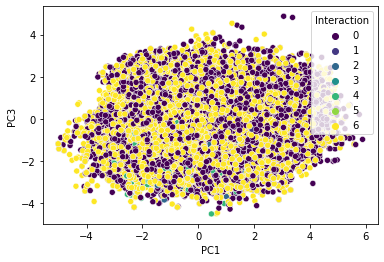

In [98]:
# plot and hope
feat1 = 'PC1'
feat2 = 'PC3'

pca_df_smol = pd.DataFrame(pca_df.iloc[:50000, :])
sns.scatterplot(data=pca_df_smol,x=feat1,y=feat2,hue="Interaction",palette='viridis')

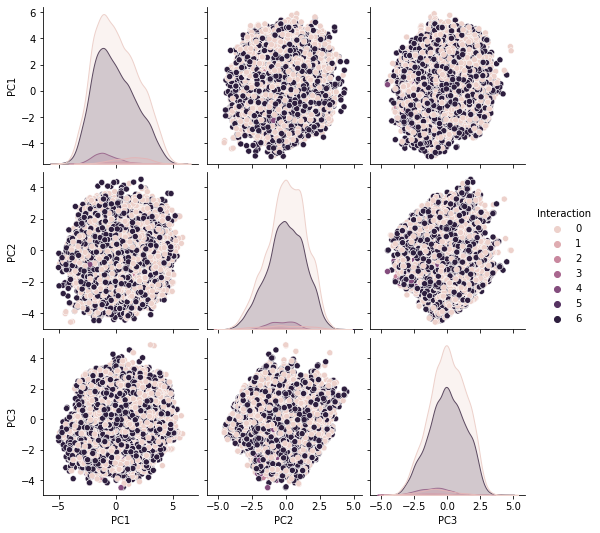

In [99]:
sns.pairplot(pca_df_smol,hue='Interaction')

# Ciao 

In [ ]:
print("Hello there")